<a href="https://colab.research.google.com/github/ThangLe2404/Microarray_ovarian_cancer/blob/main/The_microarray_ovarian_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from matplotlib.pylab import rcParams

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ML/pone.0246039.s006.csv')
df

,MZ-7.86E-05,MZ2.18E-07,MZ9.60E-05,MZ0.000366014,MZ0.000810195,MZ0.001428564,MZ0.002221123,MZ0.003187869,MZ0.004328805,MZ0.005643929,...,MZ19974.404,MZ19977.042,MZ19979.68,MZ19982.319,MZ19984.957,MZ19987.596,MZ19990.235,MZ19992.874,MZ19995.513,Class
0,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,Normal
1,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,Normal
2,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,Normal
3,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,Normal
4,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.569893,0.681316,0.988506,0.465117,0.690479,0.594937,0.642856,0.842109,0.826085,0.648350,...,0.519231,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,Cancer
249,0.569893,0.791209,0.666670,0.651163,0.785715,0.607595,1.000000,0.578952,0.739131,0.648350,...,0.462961,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,Cancer
250,0.688175,0.703294,0.655177,0.581398,0.726193,0.772153,0.583334,0.868424,0.768115,0.879119,...,0.527779,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,Cancer
251,0.838709,0.824175,0.678164,0.651163,0.809524,0.835442,0.761906,0.842109,0.594200,0.637362,...,0.532050,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,Cancer


In [3]:
df.describe()

,MZ-7.86E-05,MZ2.18E-07,MZ9.60E-05,MZ0.000366014,MZ0.000810195,MZ0.001428564,MZ0.002221123,MZ0.003187869,MZ0.004328805,MZ0.005643929,...,MZ19971.766,MZ19974.404,MZ19977.042,MZ19979.68,MZ19982.319,MZ19984.957,MZ19987.596,MZ19990.235,MZ19992.874,MZ19995.513
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.532450,0.462623,0.465859,0.421363,0.481133,0.489570,0.466263,0.512587,0.531018,0.447726,...,0.435985,0.443944,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548
std,0.183136,0.196834,0.196418,0.212991,0.196406,0.185289,0.173548,0.214232,0.215837,0.188748,...,0.160151,0.156482,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.397850,0.329667,0.321841,0.255817,0.345240,0.354432,0.345240,0.342109,0.362316,0.307689,...,0.324327,0.334049,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282
50%,0.537636,0.461537,0.459768,0.430235,0.476194,0.468359,0.464290,0.500000,0.536231,0.428571,...,0.441929,0.451566,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102
75%,0.655912,0.593407,0.597701,0.569765,0.619047,0.620253,0.595238,0.684212,0.710146,0.582418,...,0.544194,0.547010,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df['Class'].value_counts()

Cancer    162
Normal     91
Name: Class, dtype: int64

In [5]:
df_normal=df[df['Class']=='Normal']
#sns.set(font_scale=0.6)
#sns.clustermap(df_normal.iloc[:,:-1],xticklabels=df_normal.columns.values[:-1],yticklabels=df_normal.index.values)

In [6]:
df_cancer=df[df['Class']=='Cancer']
#sns.set(font_scale=0.6)
#sns.clustermap(df_cancer.iloc[:,:-1],xticklabels=df_cancer.columns.values[:-1],yticklabels=df_cancer.index.values)

In [7]:
df_normal_mean_score = pd.DataFrame(df_normal.mean())
df_normal_mean_score.reset_index(inplace=True)
df_normal_mean_score.columns = ['gene', 'ave_score']
df_normal_mean_score = df_normal_mean_score[df_normal_mean_score['ave_score'] > 0.6]
df_normal_mean_score

<ipython-input-7-8bf18e9c2b74>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_normal_mean_score = pd.DataFrame(df_normal.mean())


,gene,ave_score
184,MZ2.9182952,0.600183
185,MZ2.9502676,0.601394
540,MZ25.307419,0.695042
541,MZ25.401403,0.726081
542,MZ25.49556,0.668093
...,...,...
10005,MZ8716.4866,0.610966
10006,MZ8718.2293,0.609619
10007,MZ8719.9721,0.607840
10008,MZ8721.7152,0.606262


In [8]:
df_cancer_mean_score = pd.DataFrame(df_cancer.mean())
df_cancer_mean_score.reset_index(inplace=True)
df_cancer_mean_score.columns = ['gene', 'ave_score']
df_cancer_mean_score = df_cancer_mean_score[df_cancer_mean_score['ave_score'] < 0.4]
df_cancer_mean_score

<ipython-input-8-8d8238e4cb05>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cancer_mean_score = pd.DataFrame(df_cancer.mean())


,gene,ave_score
162,MZ2.2589739,0.397274
173,MZ2.5780962,0.385261
174,MZ2.6081524,0.353135
175,MZ2.6383828,0.356095
177,MZ2.6993663,0.319900
...,...,...
15057,MZ19742.941,0.385769
15058,MZ19745.564,0.388948
15059,MZ19748.187,0.393311
15062,MZ19756.057,0.395020


In [9]:
df_result=pd.merge(df_normal_mean_score, df_cancer_mean_score, how='outer', on='gene', indicator=True)
lst_gene = df_result[df_result['_merge'] == 'both']['gene'].tolist()
len(lst_gene)

76

In [10]:
df_filter = df[lst_gene]
df_filter['Class'] = df['Class']
df_filter

<ipython-input-10-629002172fec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Class'] = df['Class']


,MZ2.9182952,MZ25.49556,MZ25.589892,MZ26.350818,MZ27.317652,MZ27.415293,MZ27.513109,MZ27.611098,MZ27.709262,MZ27.807601,...,MZ7998.2922,MZ7999.9616,MZ8001.6311,MZ8003.3008,MZ8004.9707,MZ8006.6407,MZ8008.3109,MZ8009.9813,MZ8011.6519,Class
0,0.517787,0.547371,0.528057,0.475581,0.482510,0.471090,0.465225,0.460772,0.448918,0.444553,...,0.592027,0.586420,0.570643,0.557466,0.541694,0.519471,0.503371,0.493508,0.480685,Normal
1,0.229248,0.412020,0.393901,0.279651,0.323608,0.324198,0.317820,0.326380,0.316179,0.315143,...,0.490997,0.493923,0.491231,0.491035,0.492939,0.484231,0.472162,0.459051,0.440341,Normal
2,0.818183,0.840814,0.732053,0.862355,0.770353,0.792112,0.792042,0.802843,0.810103,0.786007,...,0.538140,0.530232,0.515255,0.503175,0.491739,0.474072,0.460491,0.449181,0.434875,Normal
3,0.636365,0.694304,0.589654,0.612427,0.581961,0.601103,0.587197,0.602917,0.602545,0.574547,...,0.786070,0.793299,0.794610,0.798077,0.804374,0.798898,0.797199,0.795075,0.784133,Normal
4,0.822136,0.664077,0.559566,0.674927,0.639843,0.651571,0.654152,0.669190,0.684390,0.673358,...,0.431498,0.423189,0.408144,0.393455,0.380265,0.363551,0.351215,0.341483,0.329961,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.482213,0.530739,0.438363,0.677980,0.583686,0.583556,0.591695,0.587595,0.583745,0.578640,...,0.696710,0.697467,0.687624,0.679447,0.669583,0.647751,0.628891,0.614478,0.595001,Cancer
249,0.474308,0.409054,0.301608,0.438154,0.479843,0.477440,0.484256,0.499169,0.469996,0.461898,...,0.501133,0.491700,0.477486,0.465556,0.454611,0.438273,0.424444,0.412667,0.398635,Cancer
250,0.521739,0.504573,0.369336,0.522020,0.519216,0.521390,0.516609,0.506184,0.519180,0.502826,...,0.405314,0.397189,0.384312,0.373448,0.362989,0.347368,0.334550,0.323615,0.311257,Cancer
251,0.339921,0.357393,0.246914,0.382267,0.387608,0.381183,0.365398,0.378992,0.361375,0.307737,...,0.848791,0.830969,0.813561,0.814250,0.828507,0.835876,0.849893,0.857835,0.851491,Cancer


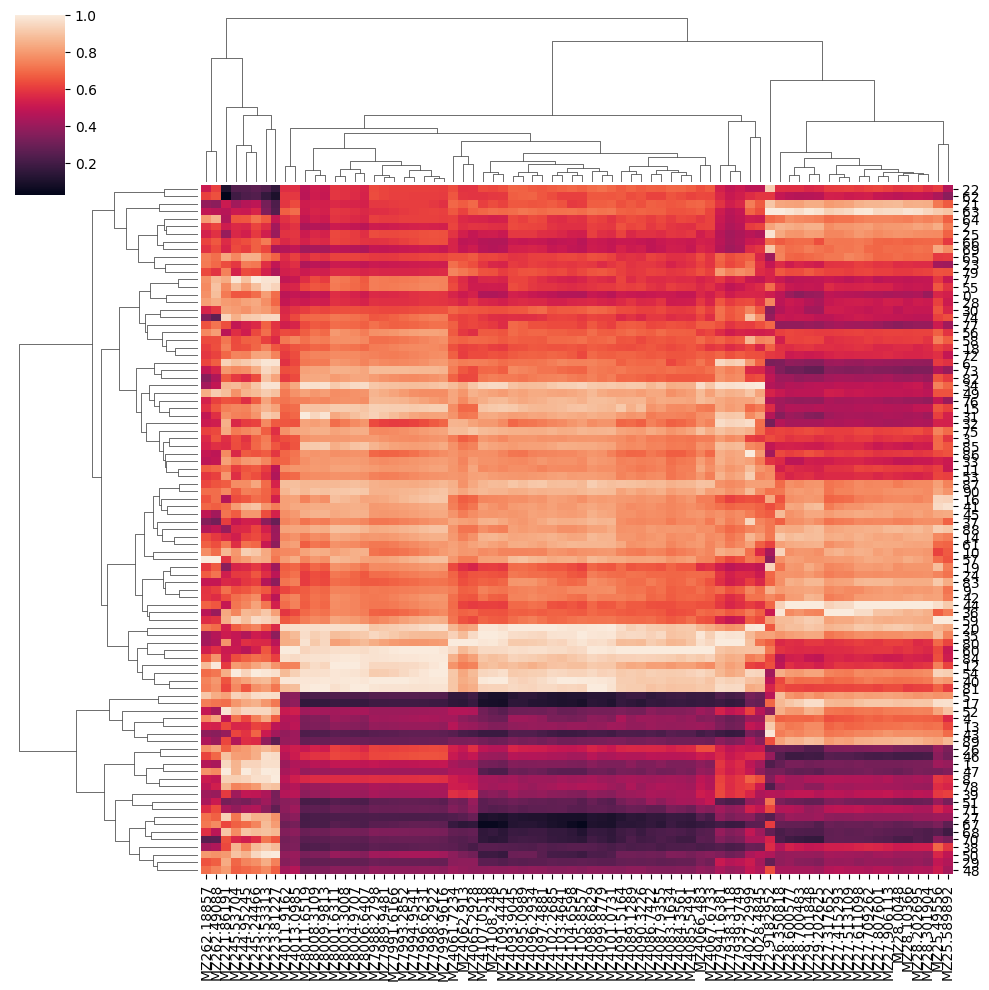

In [11]:
df_normal=df_filter[df_filter['Class']=='Normal']
# sns.set(font_scale=)
sns.clustermap(
    df_normal.iloc[:,:-1],
    xticklabels=df_normal.columns.values[:-1],
    yticklabels=df_normal.index.values
)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


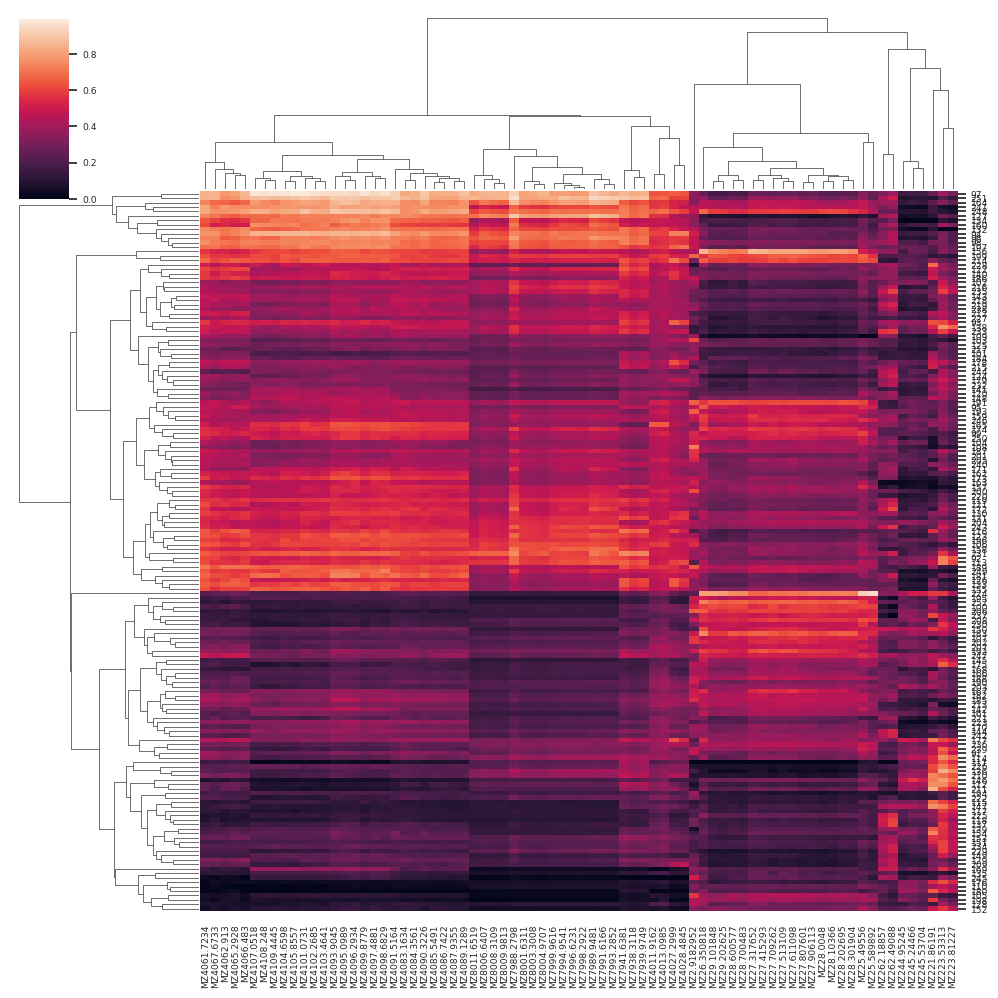

In [12]:
df_cancer=df_filter[df_filter['Class']=='Cancer']
sns.set(font_scale=0.6)
sns.clustermap(
    df_cancer.iloc[:,:-1],
    xticklabels=df_cancer.columns.values[:-1],
    yticklabels=df_cancer.index.values
)

**MODEL**

In [13]:
y_raw = df['Class']
X_raw = df.drop('Class', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=0)

label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [15]:
def plot_confusion_matrix(cm, classes=label_encoder.classes_, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j] * 100, fmt) + "%",
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


ACC:       0.9868421052631579
Precision: 0.987090367428004
Recall:    0.9868421052631579
F1:        0.9867647843011784
AUC:       0.9791666666666667
MCC:       0.9696657013254847
              precision    recall  f1-score   support

           0     1.0000    0.9811    0.9905        53
           1     0.9583    1.0000    0.9787        23

    accuracy                         0.9868        76
   macro avg     0.9792    0.9906    0.9846        76
weighted avg     0.9874    0.9868    0.9869        76



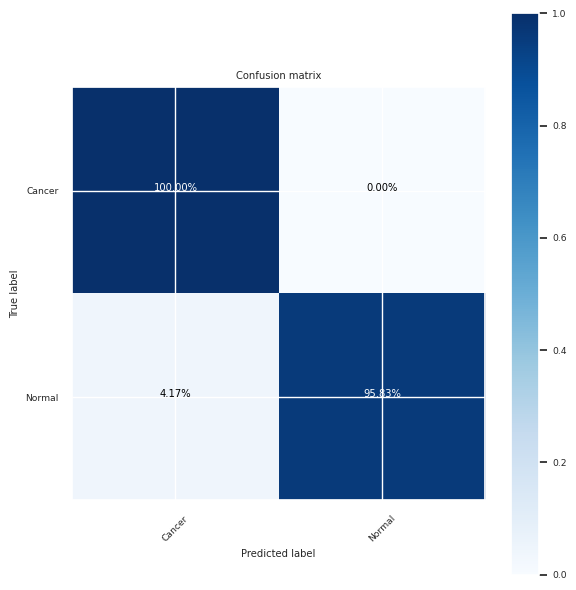

In [16]:
#RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
# fit and train and predict
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

def result_metric(y_test, y_pred):
  # accuracy: (tp + tn) / (p + n)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("\nACC:       {}".format(accuracy))

  # precision tp / (tp + fp)
  precision = metrics.precision_score(y_test, y_pred, average='weighted')
  print("Precision: {}".format(precision))

  # recall: tp / (tp + fn)
  recall = metrics.recall_score(y_test, y_pred, average='weighted')
  print("Recall:    {}".format(recall))

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = metrics.f1_score(y_test, y_pred, average='weighted')
  print("F1:        {}".format(f1))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
  auc_score = metrics.auc(fpr, tpr)
  print("AUC:       {}".format(auc_score))

  mcc_score = metrics.matthews_corrcoef(y_test, y_pred)
  print("MCC:       {}".format(metrics.matthews_corrcoef(y_test, y_pred)))

  print(metrics.classification_report(y_pred, y_test, digits=4))

  cm = confusion_matrix(y_test, y_pred)
  cm
  plot_confusion_matrix(cm)

result_metric(y_test, y_pred)

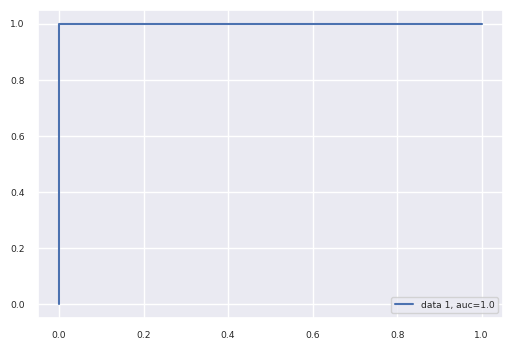

In [17]:
def roc_vi(clf,X_test,y_test):
  y_pred_proba = clf.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  rcParams['figure.figsize'] =6,4
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()
roc_vi(clf,X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



ACC:       1.0
Precision: 1.0
Recall:    1.0
F1:        1.0
AUC:       1.0
MCC:       1.0
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        52
           1     1.0000    1.0000    1.0000        24

    accuracy                         1.0000        76
   macro avg     1.0000    1.0000    1.0000        76
weighted avg     1.0000    1.0000    1.0000        76



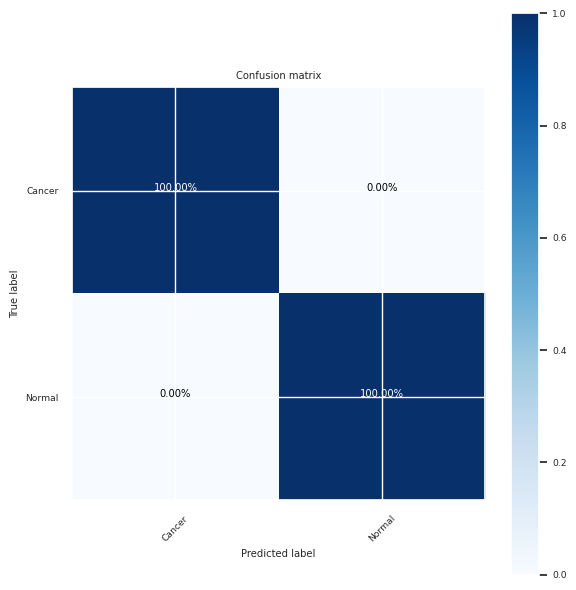

In [18]:
#LogisticRegression:
clf = LogisticRegression(random_state=0)
# fit and train and predict
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

result_metric(y_test, y_pred)

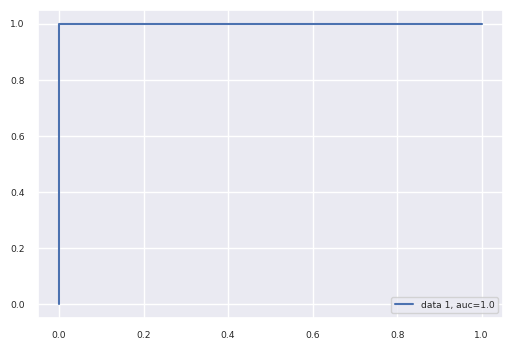

In [19]:
roc_vi(clf,X_test,y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

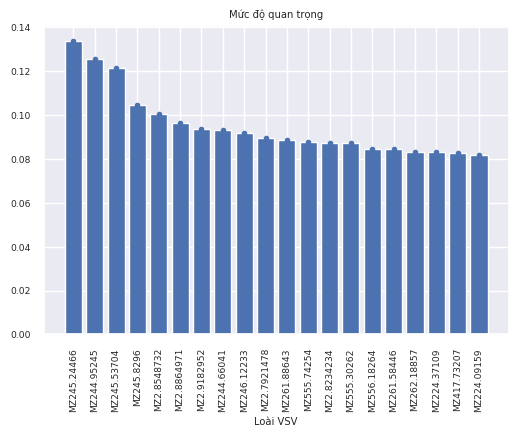

In [20]:
feature_names = X_train.columns.tolist()
feature_score = clf.coef_[0].tolist()

list_feature = dict.fromkeys(feature_names)

for i, key in enumerate(list_feature):
    list_feature[key] = feature_score[i]
list_feature

list_feature = dict(sorted(list_feature.items(), key=lambda item: item[1], reverse=True))
top_30 = dict(list(list_feature.items())[0: 20])
top_30

data = top_30
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)

plt.errorbar(names,values, linestyle='None', marker='.')

plt.title('Mức độ quan trọng')
plt.xlabel('Loài VSV')
plt.xticks(rotation = 90)

plt.show

In [21]:
names

['MZ245.24466',
 'MZ244.95245',
 'MZ245.53704',
 'MZ245.8296',
 'MZ2.8548732',
 'MZ2.8864971',
 'MZ2.9182952',
 'MZ244.66041',
 'MZ246.12233',
 'MZ2.7921478',
 'MZ261.88643',
 'MZ555.74254',
 'MZ2.8234234',
 'MZ555.30262',
 'MZ556.18264',
 'MZ261.58446',
 'MZ262.18857',
 'MZ224.37109',
 'MZ417.73207',
 'MZ224.09159']

In [22]:
df_select=df[names]

y_raw = df['Class']
X_raw = df_select

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=0)

label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)


ACC:       1.0
Precision: 1.0
Recall:    1.0
F1:        1.0
AUC:       1.0
MCC:       1.0
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        52
           1     1.0000    1.0000    1.0000        24

    accuracy                         1.0000        76
   macro avg     1.0000    1.0000    1.0000        76
weighted avg     1.0000    1.0000    1.0000        76



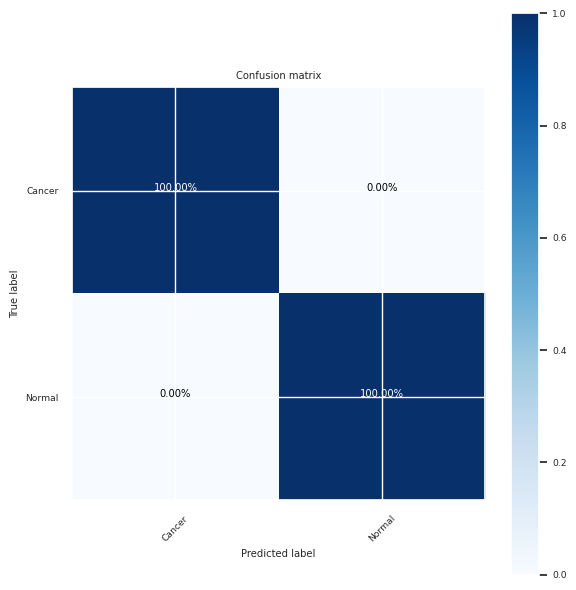

In [23]:
#LogisticRegression:
clf = LogisticRegression(random_state=0)
# fit and train and predict
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

result_metric(y_test, y_pred)

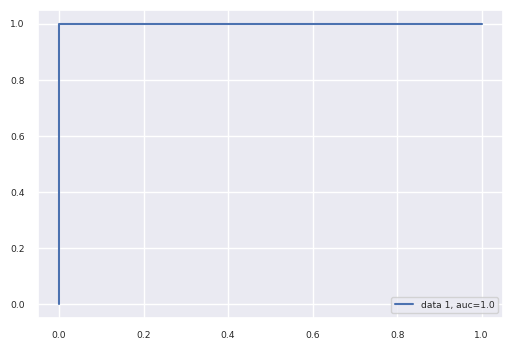

In [24]:
roc_vi(clf,X_test,y_test)